In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Process
1. Get dataset
2. Define a network
3. Choose optimizer, loss function
4. Train the network
5. Test the network

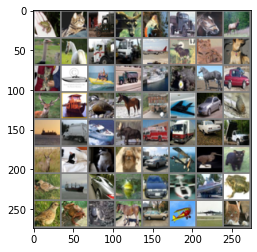

 frog  cattruck deer birdtruckhorse deer birdhorsetrucktruckplane deer  cat  dog  cat ship shiptruck ship froghorse  car deer ship birdhorsetruckplane  car bird shiptruck ship deertrucktruck  cartruck deer  cat  cat  dog  carplane bird  cat bird ship  car frog  carplane ship frog bird frog froghorse  carplaneplane  cat


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s'%classes[labels[j]] for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # torch.nn.Conv2d(in_channels, 
    # out_channels, kernel_size, stride=1, padding=0)
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1)
    # image will become 28x28x6 
    # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
    self.pool = nn.MaxPool2d(2,2)
    # image will become 14x14x6
    self.conv2 = nn.Conv2d(6, 16, 5)
    
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    # print('first conv: ',x.shape)
    #image will be 28x28x6
    x = self.pool(x)
    # print('first pool: ',x.shape)
    # image will become 14x14x6
    x = F.relu(self.conv2(x))
    # print('second conv: ',x.shape)
    # image will become 10x10x16
    x = self.pool(x)
    # print('second pool: ',x.shape)
    # image will become 5x5x16
    # Flattens input by reshaping it into a one-dimensional tensor. 
    x = torch.flatten(x, 1)
    # print('flattening: ',x.shape)
    x = F.relu(self.fc1(x))
    # print('first Linear: ',x.shape)
    x = F.relu(self.fc2(x))
    # print('second Linear: ',x.shape)
    x = self.fc3(x)
    # print('Third Linear: ',x.shape)
    return x

net = Net()


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


In [ ]:
# Train the network
# out = net(images)

for epoch in range():

  running_loss = 0
  for i, data in enumerate(trainloader):
    images, labels = data
    optimizer.zero_grad()
    out = net(images)
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('[%d, %5d] loss: %3f'%(epoch + 1, i + 1, running_loss/100))
      running_loss = 0

print('End of the training')

[1,   100] loss: 1.690645
[1,   200] loss: 1.715204
[1,   300] loss: 1.592317
[1,   400] loss: 1.715220
[1,   500] loss: 1.600351
[1,   600] loss: 1.691441
[1,   700] loss: 1.643520
[1,   800] loss: 1.614685
[1,   900] loss: 1.626609
[1,  1000] loss: 1.678213
[1,  1100] loss: 1.661646
[1,  1200] loss: 1.621601
[1,  1300] loss: 1.609054
[1,  1400] loss: 1.759550
[1,  1500] loss: 1.578022
[1,  1600] loss: 1.599296
[1,  1700] loss: 1.611737
[1,  1800] loss: 1.712471
[1,  1900] loss: 1.573841
[1,  2000] loss: 1.631609
[1,  2100] loss: 1.529980
[1,  2200] loss: 1.671194
[1,  2300] loss: 1.596817
[1,  2400] loss: 1.541588
[1,  2500] loss: 1.555272
[1,  2600] loss: 1.561087
[1,  2700] loss: 1.690341
[1,  2800] loss: 1.437719
[1,  2900] loss: 1.592028
[1,  3000] loss: 1.571775
[1,  3100] loss: 1.605644
[1,  3200] loss: 1.547700
[1,  3300] loss: 1.588750
[1,  3400] loss: 1.469630
[1,  3500] loss: 1.562344
[1,  3600] loss: 1.424390
[1,  3700] loss: 1.513556
[1,  3800] loss: 1.590582
[1,  3900] l

In [ ]:
## Test the network

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))